In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import seaborn as sns

In [2]:
#Loading and displaying data
data_assessments = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\assessments.csv")
data_courses = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\courses.csv")
data_st_assessments = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\studentAssessment.csv")
data_st_info = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\studentInfo.csv")
data_st_reg = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\studentRegistration.csv")
studentVle = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\studentVle.csv")
Vle = pd.read_csv("C:\\Users\\drinc\\OneDrive\\Desktop\\IDS project\\vle.csv")

data_assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [3]:
data_courses


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [4]:
data_st_assessments


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [5]:
data_st_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [6]:
data_st_reg


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [7]:
studentVle


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [8]:
Vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [9]:
#Descriptive statistics, checking all data types, including the otliers
data_assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [10]:
data_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [11]:
data_courses.describe()


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [12]:
data_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [13]:
data_st_assessments.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [14]:
data_st_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [15]:
data_st_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [16]:
data_st_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [17]:
data_st_reg.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [18]:
data_st_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
studentVle.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [20]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [21]:
Vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [22]:
Vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [23]:
#Checking and handling the missing values
data_st_info.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [24]:
data_st_assessments.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [25]:
studentVle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [26]:
data_st_info.dropna(inplace = True)
data_st_assessments.dropna(inplace = True)
studentVle.dropna(inplace = True)

In [27]:
#Merging categories 'Pass' and 'Distinction'
data_st_info['final_result'] = data_st_info['final_result'].replace({'Distinction': 'Pass'})
print(data_st_info['final_result'].value_counts())

final_result
Pass         14655
Withdrawn     9920
Fail          6907
Name: count, dtype: int64


In [28]:
#Exclusion of data from category 'Withdrawn' from the analysis
dsi = data_st_info[data_st_info['final_result'] != 'Withdrawn']
print(dsi['final_result'].value_counts())

final_result
Pass    14655
Fail     6907
Name: count, dtype: int64


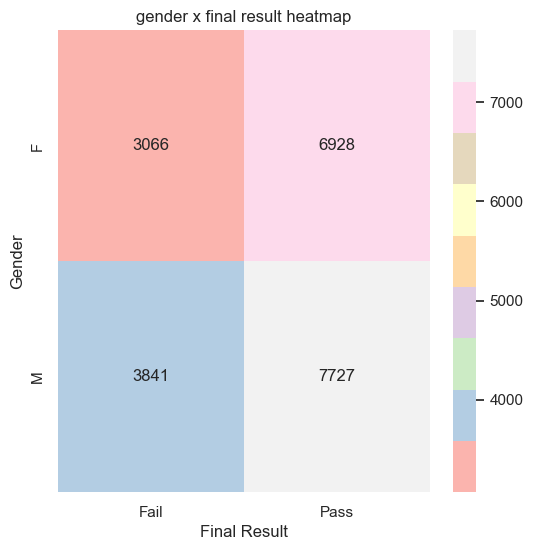

In [29]:
#Data visualization
grouped_data = dsi.groupby(['gender', 'final_result']).size().unstack()

sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="Pastel1")

plt.title('gender x final result heatmap')
plt.xlabel('Final Result')
plt.ylabel('Gender')

plt.show()

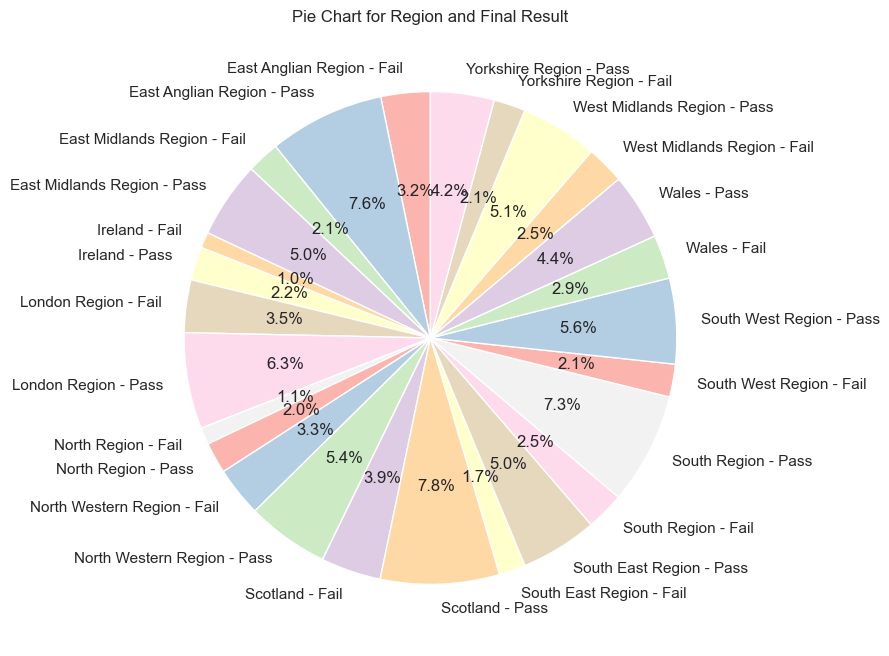

In [30]:
#Visual representation of demographic variables and final result
pie_data = dsi.groupby(['region', 'final_result']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.title('Pie Chart for Region and Final Result')
colors = sns.color_palette('Pastel1')
plt.pie(pie_data['count'], labels=pie_data['region'] + ' - ' + pie_data['final_result'], autopct='%1.1f%%', colors=colors, startangle=90)

plt.show()

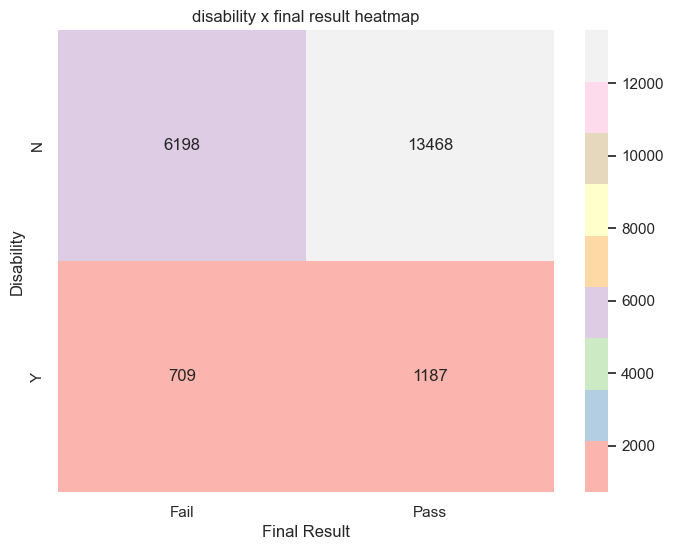

In [31]:
grouped_data = dsi.groupby(['disability', 'final_result']).size().unstack()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="Pastel1")

plt.title('disability x final result heatmap')
plt.xlabel('Final Result')
plt.ylabel('Disability')

plt.show()

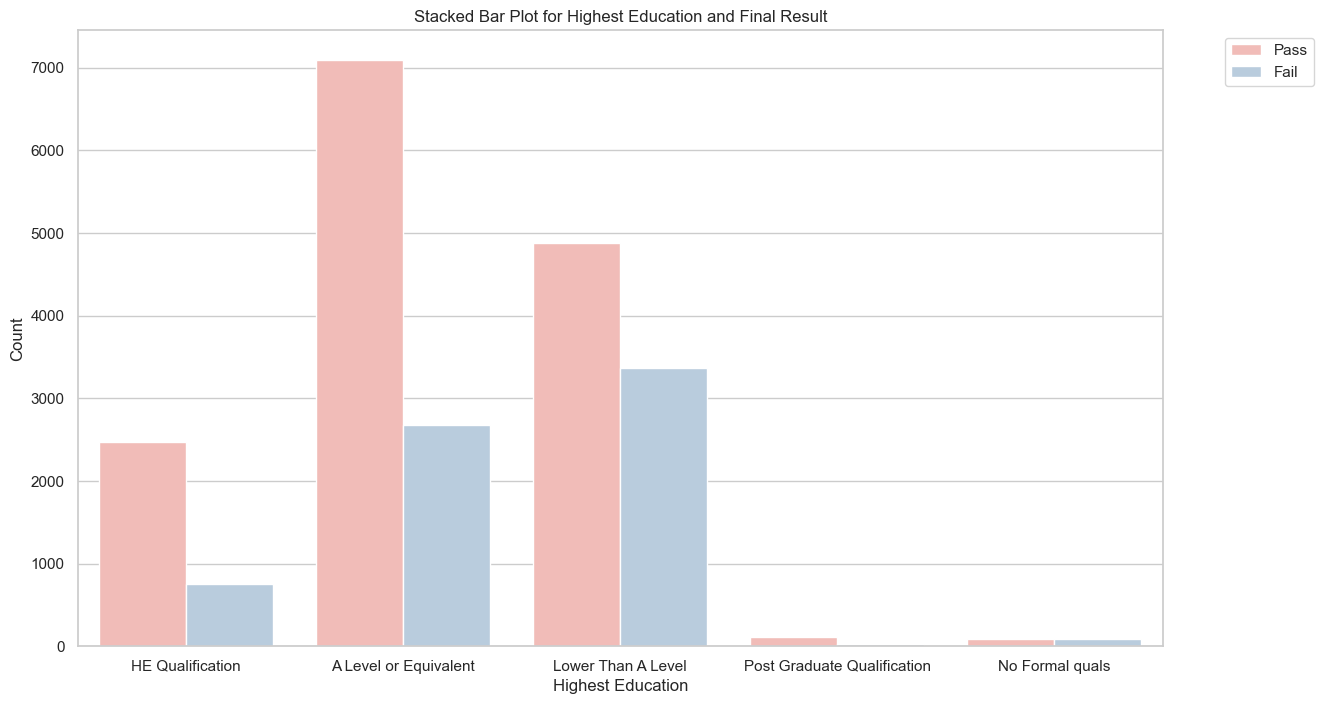

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.countplot(x='highest_education', hue='final_result', data=dsi, palette='Pastel1')
plt.title('Stacked Bar Plot for Highest Education and Final Result')
plt.xlabel('Highest Education')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

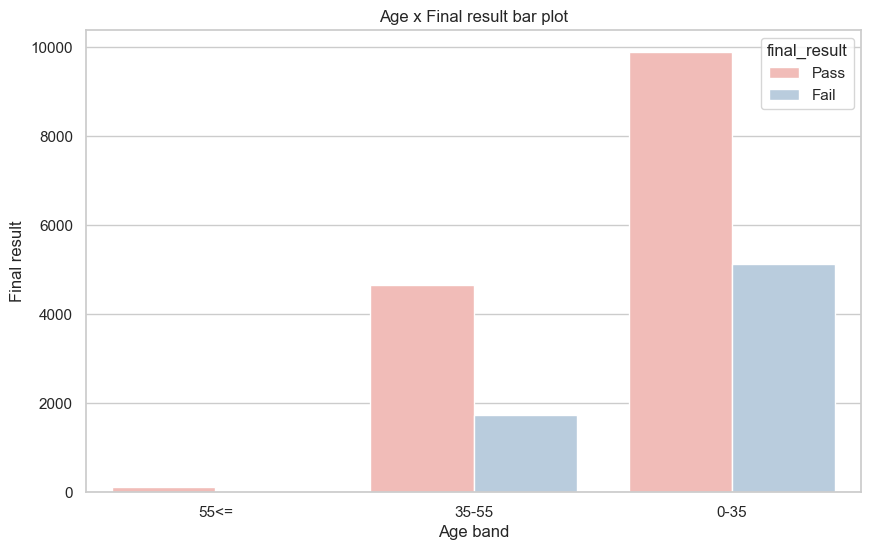

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_band', hue='final_result', data=dsi, palette='Pastel1')
plt.title('Age x Final result bar plot')
plt.xlabel('Age band')
plt.ylabel('Final result')

plt.show()

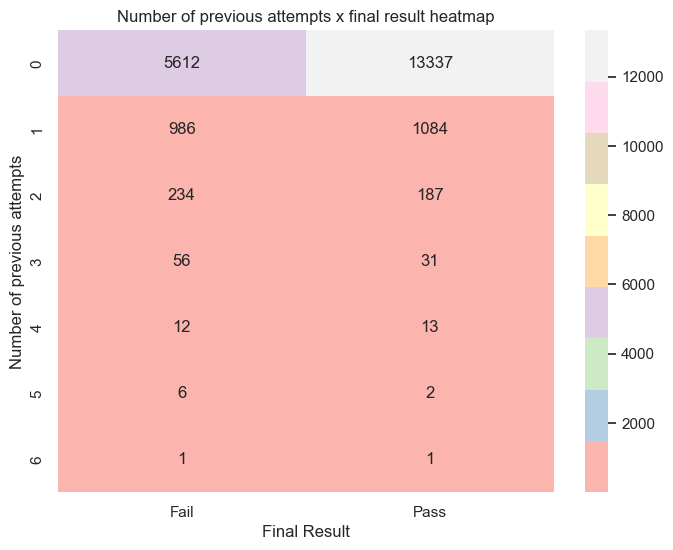

In [34]:
grouped_data = dsi.groupby(['num_of_prev_attempts', 'final_result']).size().unstack()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(grouped_data, annot=True, fmt="d", cmap="Pastel1")

plt.title('Number of previous attempts x final result heatmap')
plt.xlabel('Final Result')
plt.ylabel('Number of previous attempts')

plt.show()

In [35]:
#creating a new binary variable 'daily_activity'
studentVle['daily_activity'] = (studentVle['sum_click'] > 0).astype(int)

print(studentVle.head())

  code_module code_presentation  id_student  id_site  date  sum_click  \
0         AAA             2013J       28400   546652   -10          4   
1         AAA             2013J       28400   546652   -10          1   
2         AAA             2013J       28400   546652   -10          1   
3         AAA             2013J       28400   546614   -10         11   
4         AAA             2013J       28400   546714   -10          1   

   daily_activity  
0               1  
1               1  
2               1  
3               1  
4               1  


In [36]:
dsi.to_csv('cleaned_dsi.csv', index=False)

In [37]:
#Encoding categorical variables using label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'region', 'highest_education', 'disability', 'final_result', 'imd_band', 'age_band', 'code_module', 'code_presentation']

for col in columns_to_encode:
    dsi[col] = label_encoder.fit_transform(dsi[col])
    
dsi

C:\Users\drinc\AppData\Local\Temp\ipykernel_18228\2465089967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsi[col] = label_encoder.fit_transform(dsi[col])
C:\Users\drinc\AppData\Local\Temp\ipykernel_18228\2465089967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsi[col] = label_encoder.fit_transform(dsi[col])
C:\Users\drinc\AppData\Local\Temp\ipykernel_18228\2465089967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,0,1,11391,1,0,1,9,2,0,240,0,1
1,0,1,28400,0,6,1,2,1,0,60,0,1
3,0,1,31604,0,7,0,5,1,0,60,0,1
4,0,1,32885,0,11,2,5,0,0,60,0,1
5,0,1,38053,1,10,0,8,1,0,60,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32587,6,3,2620947,0,6,0,8,0,0,30,1,1
32588,6,3,2640965,0,10,2,1,0,0,30,0,0
32589,6,3,2645731,0,0,2,4,1,0,30,0,1
32590,6,3,2648187,0,8,0,2,0,0,30,1,1


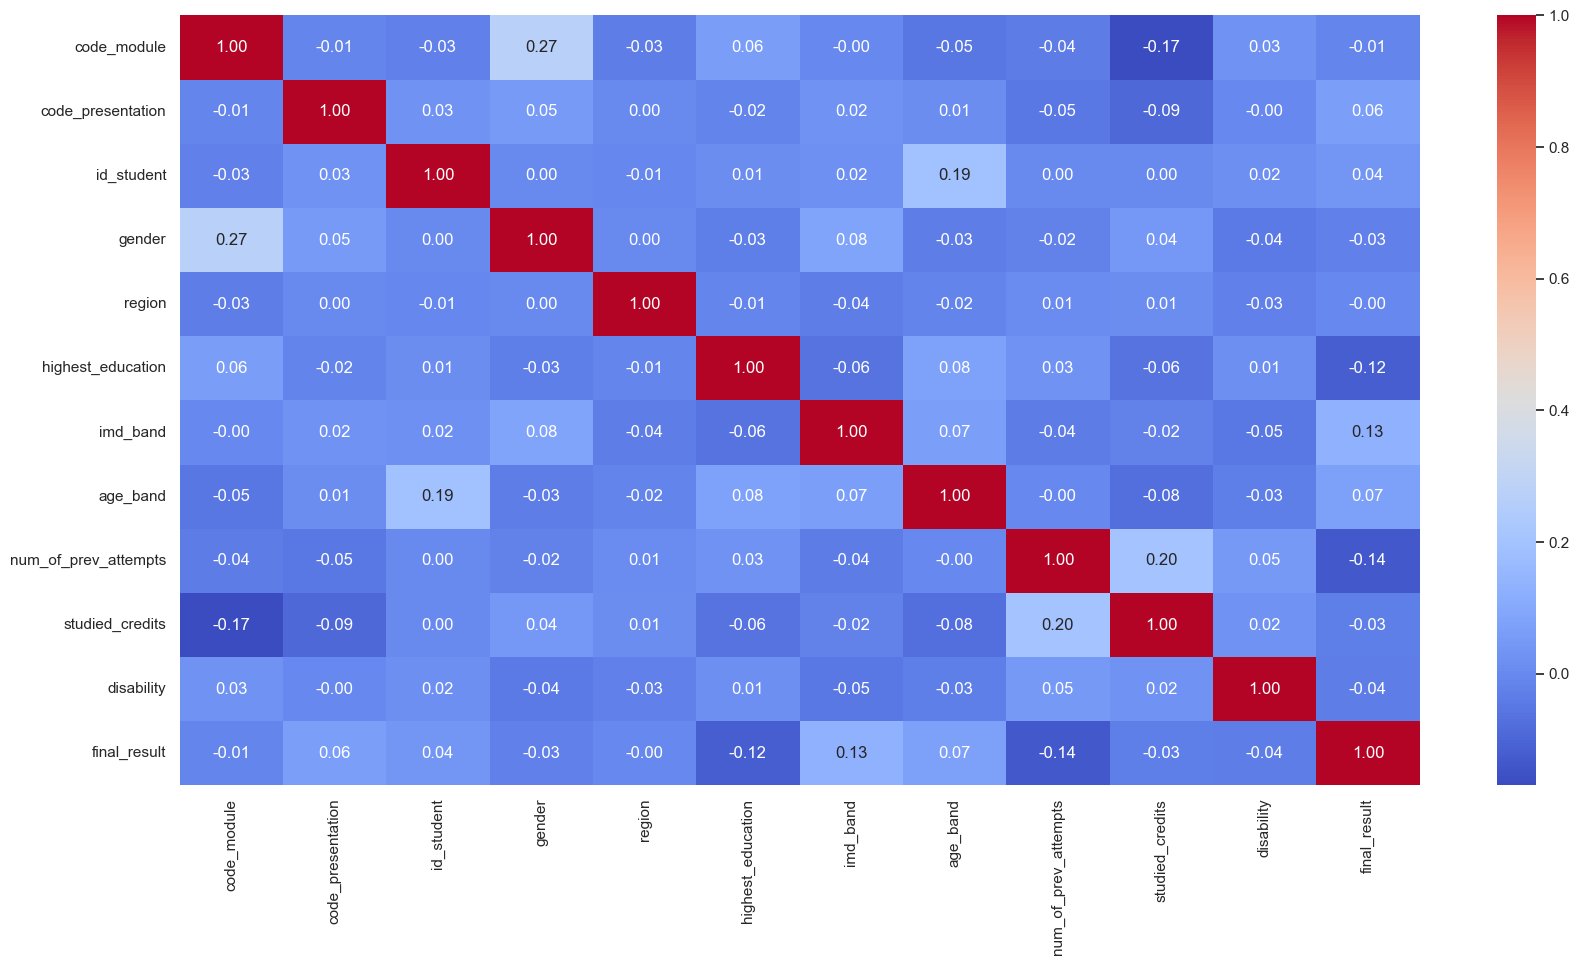

In [38]:
#Correlation matrix of all variables from the student info table
correlation_matrix = dsi.corr()


plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.show()

# Drugi dio projekta nakon konsultacija

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
#creating a new binary variable 'daily_yctivity' earlier in the code

In [41]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
 6   daily_activity     int32 
dtypes: int32(1), int64(4), object(2)
memory usage: 528.4+ MB


In [42]:
label_encoder = LabelEncoder()
columns_to_encode = ['code_module', 'code_presentation']

for col in columns_to_encode:
    studentVle[col] = label_encoder.fit_transform(studentVle[col])
    
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click,daily_activity
0,0,1,28400,546652,-10,4,1
1,0,1,28400,546652,-10,1,1
2,0,1,28400,546652,-10,1,1
3,0,1,28400,546614,-10,11,1
4,0,1,28400,546714,-10,1,1
...,...,...,...,...,...,...,...
10655275,6,3,675811,896943,269,3,1
10655276,6,3,675578,896943,269,1,1
10655277,6,3,654064,896943,269,3,1
10655278,6,3,654064,896939,269,1,1


In [43]:
#merging data for the further analysis
merged_data = pd.merge(dsi, studentVle, on=['id_student', 'code_module', 'code_presentation'], how='inner')
merged_data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click,daily_activity
0,0,1,11391,1,0,1,9,2,0,240,0,1,546669,-5,16,1
1,0,1,11391,1,0,1,9,2,0,240,0,1,546662,-5,44,1
2,0,1,11391,1,0,1,9,2,0,240,0,1,546652,-5,1,1
3,0,1,11391,1,0,1,9,2,0,240,0,1,546668,-5,2,1
4,0,1,11391,1,0,1,9,2,0,240,0,1,546652,-5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136027,6,3,2684003,0,12,1,5,1,0,30,0,1,896961,205,13,1
9136028,6,3,2684003,0,12,1,5,1,0,30,0,1,896959,205,2,1
9136029,6,3,2684003,0,12,1,5,1,0,30,0,1,896943,219,1,1
9136030,6,3,2684003,0,12,1,5,1,0,30,0,1,896961,219,31,1


In [44]:
#when merging the tables, I noticed that the id student column has a large number of duplicates:
final_data = merged_data.drop_duplicates(subset=['id_student'])
final_data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click,daily_activity
0,0,1,11391,1,0,1,9,2,0,240,0,1,546669,-5,16,1
196,0,1,28400,0,6,1,2,1,0,60,0,1,546652,-10,4,1
626,0,1,31604,0,7,0,5,1,0,60,0,1,546672,-10,1,1
1289,0,1,32885,0,11,2,5,0,0,60,0,1,546681,-10,5,1
1641,0,1,38053,1,10,0,8,1,0,60,0,1,546879,-10,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135306,6,3,2620947,0,6,0,8,0,0,30,1,1,897076,-4,1,1
9135487,6,3,2640965,0,10,2,1,0,0,30,0,0,896943,-4,2,1
9135506,6,3,2645731,0,0,2,4,1,0,30,0,1,897083,19,1,1
9135743,6,3,2648187,0,8,0,2,0,0,30,1,1,897071,-10,1,1


In [45]:
#the variable 'daily_activity' is not variable..
print(final_data['daily_activity'].describe())

count    19964.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: daily_activity, dtype: float64


In [46]:
#an attempt to replicate the results
features = final_data[['gender', 'region', 'highest_education', 'disability','age_band', 'daily_activity']]
target = final_data['final_result']


In [47]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), SVC()]

for model in models:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, features, target, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, features, target, cv=cv, scoring='precision')
    recall = cross_val_score(model, features, target, cv=cv, scoring='recall')
    f1 = cross_val_score(model, features, target, cv=cv, scoring='f1')

    print(f'Model: {model.__class__.__name__}')
    print(f'Accuracy: {accuracy.mean()}')
    print(f'Precision: {precision.mean()}')
    print(f'Recall: {recall.mean()}')
    print(f'F1 Score: {f1.mean()}')
    print('\n')

Model: DecisionTreeClassifier
Accuracy: 0.6802744356732499
Precision: 0.6929229125658144
Recall: 0.956581556694382
F1 Score: 0.8036645627668065


Model: RandomForestClassifier
Accuracy: 0.6809255877143718
Precision: 0.6927299990420993
Recall: 0.958924618541093
F1 Score: 0.8048964659355884


Model: LogisticRegression
Accuracy: 0.6836304966557206
Precision: 0.6845311951490415
Recall: 0.9970714474503197
F1 Score: 0.8117540670918235


Model: SVC
Accuracy: 0.6841314359246919
Precision: 0.6841314359246919
Recall: 1.0
F1 Score: 0.8124442285189151


